In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns

# Additional utilities
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter
import statistics
from textblob import TextBlob

# Display settings for visualization
%matplotlib inline
sns.set(style="whitegrid")

In [7]:
# Read CSV
df = pd.read_csv('../data/data.csv', sep=';')
df.sample(10)

,Feedback Roles,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q34,Q35,Q36,Q37,Q38,Q39,Q40,OQ1,OQ2,OQ3
11,Others,5,4,5,4,4,4,3,5,3,...,3,4,3,3,5,5,5,Be a strong spokesperson for the team and keep...,Prepare well in advance to avoid last-minute w...,Talk too long with tendency for change topic.
8,Direct Reports,4,5,6,4,6,6,6,5,6,...,6,2,4,6,3,5,5,"Work on long-term vision, creates a climate wh...",create more opportunities to the team to be mo...,Nothing to add.
6,Direct Reports,6,6,5,5,3,3,2,3,4,...,6,5,5,5,4,6,6,To inspire creative and bold thinking about th...,"Improve delegating your work, organize your te...",Perceive their organization/company as the bes...
3,Peers,3,3,5,4,5,6,5,6,6,...,6,6,6,5,6,6,6,Sharing very wide knowledge and experience.,Creating environment that people do not fear t...,Interrupt others while they are talking underm...
1,Manager,4,2,6,5,6,3,6,3,5,...,5,2,5,6,5,4,4,"Question status quo, challenge organization. B...",Build stronger team spirit in the organization...,"Stop worrying too much, at times. You are doin..."
12,Others,5,4,4,4,3,5,3,4,4,...,3,4,4,3,4,5,4,Pragmatic and calm approach to responsibilities.,Give regular feedbacks (negative and positive)...,"Stop trying to do everything yourself. Rather,..."
7,Direct Reports,5,5,4,6,5,5,5,4,5,...,5,4,5,5,5,5,5,"Stay passionate, ambitious, committed. Stay br...",Give more recognition to the other (direct and...,No observation.
10,Others,6,3,3,6,6,5,5,6,5,...,5,4,3,5,3,6,6,always look into future\nkeep her level of pre...,Delegate more,I have no special recommendations.
0,Self,3,6,4,5,5,3,5,4,3,...,3,2,4,5,3,3,4,.,.,.
5,Direct Reports,5,4,6,6,4,5,4,5,5,...,3,5,3,5,4,5,5,Treat people with respect.,Explain with more details why sometimes decisi...,Too much focus on fine details.


In [5]:
# Display the total number of rows and columns
df.shape

(13, 44)

In [9]:
# Overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 44 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Feedback Roles  13 non-null     object
 1   Q1              13 non-null     int64 
 2   Q2              13 non-null     int64 
 3   Q3              13 non-null     int64 
 4   Q4              13 non-null     int64 
 5   Q5              13 non-null     int64 
 6   Q6              13 non-null     int64 
 7   Q7              13 non-null     int64 
 8   Q8              13 non-null     int64 
 9   Q9              13 non-null     int64 
 10  Q10             13 non-null     int64 
 11  Q11             13 non-null     int64 
 12  Q12             13 non-null     int64 
 13  Q13             13 non-null     int64 
 14  Q14             13 non-null     int64 
 15  Q15             13 non-null     int64 
 16  Q16             13 non-null     int64 
 17  Q17             13 non-null     int64 
 18  Q18         

In [11]:
# Overview of the data - summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Q1,13.0,4.615385,1.120897,3.0,4.0,5.0,5.0,6.0
Q2,13.0,4.461538,1.265924,2.0,4.0,5.0,5.0,6.0
Q3,13.0,4.692308,1.109400,3.0,4.0,5.0,6.0,6.0
Q4,13.0,4.923077,0.862316,4.0,4.0,5.0,6.0,6.0
Q5,13.0,4.692308,1.109400,3.0,4.0,5.0,6.0,6.0
Q6,13.0,4.769231,1.165751,3.0,4.0,5.0,6.0,6.0
Q7,13.0,4.538462,1.391365,2.0,3.0,5.0,6.0,6.0
Q8,13.0,4.769231,1.091928,3.0,4.0,5.0,6.0,6.0
Q9,13.0,4.846154,1.068188,3.0,4.0,5.0,6.0,6.0
Q10,13.0,4.923077,1.115164,3.0,4.0,5.0,6.0,6.0


In [13]:
# Check for missing values
print("\nMissing Values per Column:")
pd.options.display.max_rows = None
print(df.isnull().sum())


Missing Values per Column:
Feedback Roles    0
Q1                0
Q2                0
Q3                0
Q4                0
Q5                0
Q6                0
Q7                0
Q8                0
Q9                0
Q10               0
Q11               0
Q12               0
Q13               0
Q14               0
Q15               0
Q16               0
Q17               0
Q18               0
Q19               0
Q20               0
Q21               0
Q22               0
Q23               0
Q24               0
Q25               0
Q26               0
Q27               0
Q28               0
Q29               0
Q30               0
Q31               0
Q32               0
Q33               0
Q34               0
Q35               0
Q36               0
Q37               0
Q38               0
Q39               0
Q40               0
OQ1               0
OQ2               0
OQ3               0
dtype: int64


In [17]:
# Overview of feedback roles
value_counts = df['Feedback Roles'].value_counts()
print(value_counts)

Feedback Roles
Direct Reports    5
Peers             3
Others            3
Self              1
Manager           1
Name: count, dtype: int64


In [35]:
# Check if any column contain the value "7 - Answers with No Observation"
contains_seven = all(7 in df[col].values for col in df.columns)

if contains_seven:
    # Count total occurrences of "7"
    total_count = (df == 7).sum().sum()
    print(f"Some columns contain the value 7. Total count of 7: {total_count}")
else:
    print("None of the columns contains the value 7.")

None of the columns contains the value 7.


In [37]:
# Chapter 1 Calculations

In [39]:
# Competencies distribution
print('''\nThe competencies distribution is as follows: 
Competency 1 - Q1, Q2, Q3, Q4, Q6, Q7, Q8; 
Competency 2 - Q9, Q10, Q11, Q12, Q13, Q14, Q15, Q16;
Competency 3 - Q17, Q18, Q19, Q20, Q21, Q22, Q23, Q24;
Competency 4 - Q25, Q26, Q27, Q28, Q29, Q30, Q31, Q32;
Competency 5 - Q33, Q34, Q35, Q36, Q37, Q38, Q39, Q40''')


The competencies distribution is as follows: 
Competency 1 - Q1, Q2, Q3, Q4, Q6, Q7, Q8; 
Competency 2 - Q9, Q10, Q11, Q12, Q13, Q14, Q15, Q16;
Competency 3 - Q17, Q18, Q19, Q20, Q21, Q22, Q23, Q24;
Competency 4 - Q25, Q26, Q27, Q28, Q29, Q30, Q31, Q32;
Competency 5 - Q33, Q34, Q35, Q36, Q37, Q38, Q39, Q40


In [43]:
# Define variables per competency
c1 = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8']
c2 = ['Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16']
c3 = ['Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24']
c4 = ['Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31', 'Q32']
c5 = ['Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40']

In [45]:
# Chapter 1.1 Calculations for role "Self"

In [47]:
# Average, Min and Max for role "Self" 

# Filter rows where the role is 'Self'
se_df = df[df['Feedback Roles'] == 'Self']

# Calculate average, min and max - Competence 1
se_c1_avg = se_df[c1].mean().mean()
se_c1_min = se_df[c1].min().min()
se_c1_max = se_df[c1].max().max()

# Calculate average, min and max - Competence 2
se_c2_avg = se_df[c2].mean().mean()
se_c2_min = se_df[c2].min().min()
se_c2_max = se_df[c2].max().max()

# Calculate average, min and max - Competence 3
se_c3_avg = se_df[c3].mean().mean()
se_c3_min = se_df[c3].min().min()
se_c3_max = se_df[c3].max().max()

# Calculate average, min and max - Competence 4
se_c4_avg = se_df[c4].mean().mean()
se_c4_min = se_df[c4].min().min()
se_c4_max = se_df[c4].max().max()

# Calculate average, min and max - Competence 5
se_c5_avg = se_df[c5].mean().mean()
se_c5_min = se_df[c5].min().min()
se_c5_max = se_df[c5].max().max()

# Print results
print(f'Average for role "Self" (Competence 1 - Q1 to Q8): {se_c1_avg}')
print(f'Min for role "Self" (Competence 1 - Q1 to Q8): {se_c1_min}')
print(f'Max for role "Self" (Competence 1 - Q1 to Q8): {se_c1_max}')

print(f'Average for role "Self" (Competence 2 - Q9 to Q16): {se_c2_avg}')
print(f'Min for role "Self" (Competence 2 - Q9 to Q16): {se_c2_min}')
print(f'Max for role "Self" (Competence 2 - Q9 to Q16): {se_c2_max}')

print(f'Average for role "Self" (Competence 3 - Q17 to Q24): {se_c3_avg}')
print(f'Min for role "Self" (Competence 3 - Q17 to Q24): {se_c3_min}')
print(f'Max for role "Self" (Competence 3 - Q17 to Q24): {se_c3_max}')

print(f'Average for role "Self" (Competence 4 - Q25 to Q32): {se_c4_avg}')
print(f'Min for role "Self" (Competence 4 - Q25 to Q32): {se_c4_min}')
print(f'Max for role "Self" (Competence 4 - Q25 to Q32): {se_c4_max}')

print(f'Average for role "Self" (Competence 5 - Q33 to Q40): {se_c5_avg}')
print(f'Min for role "Self" (Competence 5 - Q33 to Q40): {se_c5_min}')
print(f'Max for role "Self" (Competence 5 - Q33 to Q40): {se_c5_max}')

Average for role "Self" (Competence 1 - Q1 to Q8): 4.375
Min for role "Self" (Competence 1 - Q1 to Q8): 3
Max for role "Self" (Competence 1 - Q1 to Q8): 6
Average for role "Self" (Competence 2 - Q9 to Q16): 4.125
Min for role "Self" (Competence 2 - Q9 to Q16): 3
Max for role "Self" (Competence 2 - Q9 to Q16): 5
Average for role "Self" (Competence 3 - Q17 to Q24): 4.0
Min for role "Self" (Competence 3 - Q17 to Q24): 3
Max for role "Self" (Competence 3 - Q17 to Q24): 5
Average for role "Self" (Competence 4 - Q25 to Q32): 3.25
Min for role "Self" (Competence 4 - Q25 to Q32): 3
Max for role "Self" (Competence 4 - Q25 to Q32): 4
Average for role "Self" (Competence 5 - Q33 to Q40): 3.5
Min for role "Self" (Competence 5 - Q33 to Q40): 2
Max for role "Self" (Competence 5 - Q33 to Q40): 5


In [49]:
# Chapter 1.2 Calculations for role "Manager"

In [51]:
# Average, Min and Max for role "Manager" 

# Filter rows where the role is 'Manager'
mgr_df = df[df['Feedback Roles'] == 'Manager']

# Calculate average, min and max - Competence 1
mgr_c1_avg = mgr_df[c1].mean().mean()
mgr_c1_min = mgr_df[c1].min().min()
mgr_c1_max = mgr_df[c1].max().max()

# Calculate average, min and max - Competence 2
mgr_c2_avg = mgr_df[c2].mean().mean()
mgr_c2_min = mgr_df[c2].min().min()
mgr_c2_max = mgr_df[c2].max().max()

# Calculate average, min and max - Competence 3
mgr_c3_avg = mgr_df[c3].mean().mean()
mgr_c3_min = mgr_df[c3].min().min()
mgr_c3_max = mgr_df[c3].max().max()

# Calculate average, min and max - Competence 4
mgr_c4_avg = mgr_df[c4].mean().mean()
mgr_c4_min = mgr_df[c4].min().min()
mgr_c4_max = mgr_df[c4].max().max()

# Calculate average, min and max - Competence 5
mgr_c5_avg = mgr_df[c5].mean().mean()
mgr_c5_min = mgr_df[c5].min().min()
mgr_c5_max = mgr_df[c5].max().max()

# Print results
print(f'Average for role "Manager" (Competence 1 - Q1 to Q8): {mgr_c1_avg}')
print(f'Min for role "Manager" (Competence 1 - Q1 to Q8): {mgr_c1_min}')
print(f'Max for role "Manager" (Competence 1 - Q1 to Q8): {mgr_c1_max}')

print(f'Average for role "Manager" (Competence 2 - Q9 to Q16): {mgr_c2_avg}')
print(f'Min for role "Manager" (Competence 2 - Q9 to Q16): {mgr_c2_min}')
print(f'Max for role "Manager" (Competence 2 - Q9 to Q16): {mgr_c2_max}')

print(f'Average for role "Manager" (Competence 3 - Q17 to Q24): {mgr_c3_avg}')
print(f'Min for role "Manager" (Competence 3 - Q17 to Q24): {mgr_c3_min}')
print(f'Max for role "Manager" (Competence 3 - Q17 to Q24): {mgr_c3_max}')

print(f'Average for role "Manager" (Competence 4 - Q25 to Q32): {mgr_c4_avg}')
print(f'Min for role "Manager" (Competence 4 - Q25 to Q32): {mgr_c4_min}')
print(f'Max for role "Manager" (Competence 4 - Q25 to Q32): {mgr_c4_max}')

print(f'Average for role "Manager" (Competence 5 - Q33 to Q40): {mgr_c5_avg}')
print(f'Min for role "Manager" (Competence 5 - Q33 to Q40): {mgr_c5_min}')
print(f'Max for role "Manager" (Competence 5 - Q33 to Q40): {mgr_c5_max}')

Average for role "Manager" (Competence 1 - Q1 to Q8): 4.375
Min for role "Manager" (Competence 1 - Q1 to Q8): 2
Max for role "Manager" (Competence 1 - Q1 to Q8): 6
Average for role "Manager" (Competence 2 - Q9 to Q16): 4.375
Min for role "Manager" (Competence 2 - Q9 to Q16): 2
Max for role "Manager" (Competence 2 - Q9 to Q16): 6
Average for role "Manager" (Competence 3 - Q17 to Q24): 4.5
Min for role "Manager" (Competence 3 - Q17 to Q24): 2
Max for role "Manager" (Competence 3 - Q17 to Q24): 6
Average for role "Manager" (Competence 4 - Q25 to Q32): 4.125
Min for role "Manager" (Competence 4 - Q25 to Q32): 2
Max for role "Manager" (Competence 4 - Q25 to Q32): 5
Average for role "Manager" (Competence 5 - Q33 to Q40): 4.5
Min for role "Manager" (Competence 5 - Q33 to Q40): 2
Max for role "Manager" (Competence 5 - Q33 to Q40): 6


In [53]:
# Chapter 1.3 Calculations for role "Peers"

In [55]:
# Average, Min and Max for role "Peers" 

# Filter rows where the role is 'Peers'
pe_df = df[df['Feedback Roles'] == 'Peers']

# Calculate average, min and max - Competence 1
pe_c1_avg = pe_df[c1].mean().mean()
pe_c1_min = pe_df[c1].min().min()
pe_c1_max = pe_df[c1].max().max()

# Calculate average, min and max - Competence 2
pe_c2_avg = pe_df[c2].mean().mean()
pe_c2_min = pe_df[c2].min().min()
pe_c2_max = pe_df[c2].max().max()

# Calculate average, min and max - Competence 3
pe_c3_avg = pe_df[c3].mean().mean()
pe_c3_min = pe_df[c3].min().min()
pe_c3_max = pe_df[c3].max().max()

# Calculate average, min and max - Competence 4
pe_c4_avg = pe_df[c4].mean().mean()
pe_c4_min = pe_df[c4].min().min()
pe_c4_max = pe_df[c4].max().max()

# Calculate average, min and max - Competence 5
pe_c5_avg = pe_df[c5].mean().mean()
pe_c5_min = pe_df[c5].min().min()
pe_c5_max = pe_df[c5].max().max()

# Print results
print(f'Average for role "Peers" (Competence 1 - Q1 to Q8): {pe_c1_avg}')
print(f'Min for role "Peers" (Competence 1 - Q1 to Q8): {pe_c1_min}')
print(f'Max for role "Peers" (Competence 1 - Q1 to Q8): {pe_c1_max}')

print(f'Average for role "Peers" (Competence 2 - Q9 to Q16): {pe_c2_avg}')
print(f'Min for role "Peers" (Competence 2 - Q9 to Q16): {pe_c2_min}')
print(f'Max for role "Peers" (Competence 2 - Q9 to Q16): {pe_c2_max}')

print(f'Average for role "Peers" (Competence 3 - Q17 to Q24): {pe_c3_avg}')
print(f'Min for role "Peers" (Competence 3 - Q17 to Q24): {pe_c3_min}')
print(f'Max for role "Peers" (Competence 3 - Q17 to Q24): {pe_c3_max}')

print(f'Average for role "Peers" (Competence 4 - Q25 to Q32): {pe_c4_avg}')
print(f'Min for role "Peers" (Competence 4 - Q25 to Q32): {pe_c4_min}')
print(f'Max for role "Peers" (Competence 4 - Q25 to Q32): {pe_c4_max}')

print(f'Average for role "Peers" (Competence 5 - Q33 to Q40): {pe_c5_avg}')
print(f'Min for role "Peers" (Competence 5 - Q33 to Q40): {pe_c5_min}')
print(f'Max for role "Peers" (Competence 5 - Q33 to Q40): {pe_c5_max}')

Average for role "Peers" (Competence 1 - Q1 to Q8): 4.958333333333334
Min for role "Peers" (Competence 1 - Q1 to Q8): 3
Max for role "Peers" (Competence 1 - Q1 to Q8): 6
Average for role "Peers" (Competence 2 - Q9 to Q16): 5.125
Min for role "Peers" (Competence 2 - Q9 to Q16): 3
Max for role "Peers" (Competence 2 - Q9 to Q16): 6
Average for role "Peers" (Competence 3 - Q17 to Q24): 5.541666666666667
Min for role "Peers" (Competence 3 - Q17 to Q24): 4
Max for role "Peers" (Competence 3 - Q17 to Q24): 6
Average for role "Peers" (Competence 4 - Q25 to Q32): 5.25
Min for role "Peers" (Competence 4 - Q25 to Q32): 3
Max for role "Peers" (Competence 4 - Q25 to Q32): 6
Average for role "Peers" (Competence 5 - Q33 to Q40): 5.625
Min for role "Peers" (Competence 5 - Q33 to Q40): 5
Max for role "Peers" (Competence 5 - Q33 to Q40): 6


In [57]:
# Chapter 1.4 Calculations for role "Direct Reports"

In [59]:
# Average, Min and Max for role "Direct Reports" 

# Filter rows where the role is 'Direct Reports'
dr_df = df[df['Feedback Roles'] == 'Direct Reports']

# Calculate average, min and max - Competence 1
dr_c1_avg = dr_df[c1].mean().mean()
dr_c1_min = dr_df[c1].min().min()
dr_c1_max = dr_df[c1].max().max()

# Calculate average, min and max - Competence 2
dr_c2_avg = pe_df[c2].mean().mean()
dr_c2_min = pe_df[c2].min().min()
dr_c2_max = pe_df[c2].max().max()

# Calculate average, min and max - Competence 3
dr_c3_avg = dr_df[c3].mean().mean()
dr_c3_min = dr_df[c3].min().min()
dr_c3_max = dr_df[c3].max().max()

# Calculate average, min and max - Competence 4
dr_c4_avg = dr_df[c4].mean().mean()
dr_c4_min = dr_df[c4].min().min()
dr_c4_max = dr_df[c4].max().max()

# Calculate average, min and max - Competence 5
dr_c5_avg = dr_df[c5].mean().mean()
dr_c5_min = dr_df[c5].min().min()
dr_c5_max = dr_df[c5].max().max()

# Print results
print(f'Average for role "Direct Reports" (Competence 1 - Q1 to Q8): {dr_c1_avg}')
print(f'Min for role "Direct Reports" (Competence 1 - Q1 to Q8): {dr_c1_min}')
print(f'Max for role "Direct Reports" (Competence 1 - Q1 to Q8): {dr_c1_max}')

print(f'Average for role "Direct Reports" (Competence 2 - Q9 to Q16): {dr_c2_avg}')
print(f'Min for role "Direct Reports" (Competence 2 - Q9 to Q16): {dr_c2_min}')
print(f'Max for role "Direct Reports" (Competence 2 - Q9 to Q16): {dr_c2_max}')

print(f'Average for role "Direct Reports" (Competence 3 - Q17 to Q24): {dr_c3_avg}')
print(f'Min for role "Direct Reports" (Competence 3 - Q17 to Q24): {dr_c3_min}')
print(f'Max for role "Direct Reports" (Competence 3 - Q17 to Q24): {dr_c3_max}')

print(f'Average for role "Direct Reports" (Competence 4 - Q25 to Q32): {dr_c4_avg}')
print(f'Min for role "Direct Reports" (Competence 4 - Q25 to Q32): {dr_c4_min}')
print(f'Max for role "Direct Reports" (Competence 4 - Q25 to Q32): {dr_c4_max}')

print(f'Average for role "Direct Reports" (Competence 5 - Q33 to Q40): {dr_c5_avg}')
print(f'Min for role "Direct Reports" (Competence 5 - Q33 to Q40): {dr_c5_min}')
print(f'Max for role "Direct Reports" (Competence 5 - Q33 to Q40): {dr_c5_max}')

Average for role "Direct Reports" (Competence 1 - Q1 to Q8): 4.8
Min for role "Direct Reports" (Competence 1 - Q1 to Q8): 2
Max for role "Direct Reports" (Competence 1 - Q1 to Q8): 6
Average for role "Direct Reports" (Competence 2 - Q9 to Q16): 5.125
Min for role "Direct Reports" (Competence 2 - Q9 to Q16): 3
Max for role "Direct Reports" (Competence 2 - Q9 to Q16): 6
Average for role "Direct Reports" (Competence 3 - Q17 to Q24): 4.449999999999999
Min for role "Direct Reports" (Competence 3 - Q17 to Q24): 2
Max for role "Direct Reports" (Competence 3 - Q17 to Q24): 6
Average for role "Direct Reports" (Competence 4 - Q25 to Q32): 5.050000000000001
Min for role "Direct Reports" (Competence 4 - Q25 to Q32): 2
Max for role "Direct Reports" (Competence 4 - Q25 to Q32): 6
Average for role "Direct Reports" (Competence 5 - Q33 to Q40): 4.7
Min for role "Direct Reports" (Competence 5 - Q33 to Q40): 2
Max for role "Direct Reports" (Competence 5 - Q33 to Q40): 6


In [61]:
# Chapter 1.5 Calculations for role "Others"

In [63]:
# Average, Min and Max for role "Others" 

# Filter rows where the role is 'Others'
oth_df = df[df['Feedback Roles'] == 'Others']

# Calculate average, min and max - Competence 1
oth_c1_avg = oth_df[c1].mean().mean()
oth_c1_min = oth_df[c1].min().min()
oth_c1_max = oth_df[c1].max().max()

# Calculate average, min and max - Competence 2
oth_c2_avg = oth_df[c2].mean().mean()
oth_c2_min = oth_df[c2].min().min()
oth_c2_max = oth_df[c2].max().max()

# Calculate average, min and max - Competence 3
oth_c3_avg = oth_df[c3].mean().mean()
oth_c3_min = oth_df[c3].min().min()
oth_c3_max = oth_df[c3].max().max()

# Calculate average, min and max - Competence 4
oth_c4_avg = oth_df[c4].mean().mean()
oth_c4_min = oth_df[c4].min().min()
oth_c4_max = oth_df[c4].max().max()

# Calculate average, min and max - Competence 5
oth_c5_avg = oth_df[c5].mean().mean()
oth_c5_min = oth_df[c5].min().min()
oth_c5_max = oth_df[c5].max().max()

# Print results
print(f'Average for role "Others" (Competence 1 - Q1 to Q8): {oth_c1_avg}')
print(f'Min for role "Others" (Competence 1 - Q1 to Q8): {oth_c1_min}')
print(f'Max for role "Others" (Competence 1 - Q1 to Q8): {oth_c1_max}')

print(f'Average for role "Others" (Competence 2 - Q9 to Q16): {oth_c2_avg}')
print(f'Min for role "Others" (Competence 2 - Q9 to Q16): {oth_c2_min}')
print(f'Max for role "Others" (Competence 2 - Q9 to Q16): {oth_c2_max}')

print(f'Average for role "Others" (Competence 3 - Q17 to Q24): {oth_c3_avg}')
print(f'Min for role "Others" (Competence 3 - Q17 to Q24): {oth_c3_min}')
print(f'Max for role "Others" (Competence 3 - Q17 to Q24): {oth_c3_max}')

print(f'Average for role "Others" (Competence 4 - Q25 to Q32): {oth_c4_avg}')
print(f'Min for role "Others" (Competence 4 - Q25 to Q32): {oth_c4_min}')
print(f'Max for role "Others" (Competence 4 - Q25 to Q32): {oth_c4_max}')

print(f'Average for role "Others" (Competence 5 - Q33 to Q40): {oth_c5_avg}')
print(f'Min for role "Others" (Competence 5 - Q33 to Q40): {oth_c5_min}')
print(f'Max for role "Others" (Competence 5 - Q33 to Q40): {oth_c5_max}')

Average for role "Others" (Competence 1 - Q1 to Q8): 4.416666666666666
Min for role "Others" (Competence 1 - Q1 to Q8): 3
Max for role "Others" (Competence 1 - Q1 to Q8): 6
Average for role "Others" (Competence 2 - Q9 to Q16): 4.208333333333334
Min for role "Others" (Competence 2 - Q9 to Q16): 3
Max for role "Others" (Competence 2 - Q9 to Q16): 6
Average for role "Others" (Competence 3 - Q17 to Q24): 4.25
Min for role "Others" (Competence 3 - Q17 to Q24): 3
Max for role "Others" (Competence 3 - Q17 to Q24): 6
Average for role "Others" (Competence 4 - Q25 to Q32): 4.166666666666666
Min for role "Others" (Competence 4 - Q25 to Q32): 3
Max for role "Others" (Competence 4 - Q25 to Q32): 6
Average for role "Others" (Competence 5 - Q33 to Q40): 4.041666666666667
Min for role "Others" (Competence 5 - Q33 to Q40): 3
Max for role "Others" (Competence 5 - Q33 to Q40): 6


In [65]:
# Chapter 1.6 Average calculations for all roles except "Self" for all competencies

In [67]:
# Calculate total average for all roles except "Self" for all competencies
total_avg_all_c1 = (mgr_c1_avg + pe_c1_avg + dr_c1_avg + oth_c1_avg) / 4
total_avg_all_c2 = (mgr_c2_avg + pe_c2_avg + dr_c2_avg + oth_c2_avg) / 4
total_avg_all_c3 = (mgr_c3_avg + pe_c3_avg + dr_c3_avg + oth_c3_avg) / 4
total_avg_all_c4 = (mgr_c4_avg + pe_c4_avg + dr_c4_avg + oth_c4_avg) / 4
total_avg_all_c5 = (mgr_c5_avg + pe_c5_avg + dr_c5_avg + oth_c5_avg) / 4

# Print the total average for all roles except "Self" for all competencies
print(f'Total average for all roles for Competency 1: {total_avg_all_c1}')
print(f'Total average for all roles for Competency 2: {total_avg_all_c2}')
print(f'Total average for all roles for Competency 3: {total_avg_all_c3}')
print(f'Total average for all roles for Competency 4: {total_avg_all_c4}')
print(f'Total average for all roles for Competency 5: {total_avg_all_c5}')

Total average for all roles for Competency 1: 4.637499999999999
Total average for all roles for Competency 2: 4.708333333333334
Total average for all roles for Competency 3: 4.685416666666667
Total average for all roles for Competency 4: 4.647916666666667
Total average for all roles for Competency 5: 4.716666666666667


In [70]:
# Chapter 2 Overview of Competencies

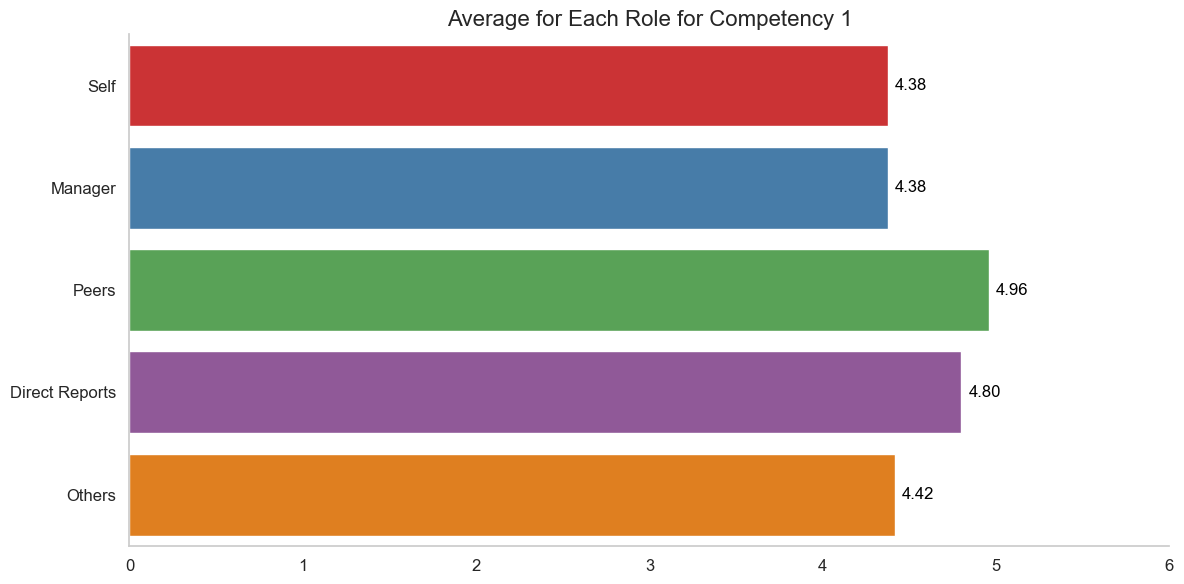

In [72]:
# Define data
c1_data = {
    'Feedback Roles': ['Self', 'Manager', 'Peers', 'Direct Reports', 'Others'],
    'Average': [se_c1_avg, mgr_c1_avg, pe_c1_avg, dr_c1_avg, oth_c1_avg]
}

# Create a DataFrame
c1_df = pd.DataFrame(c1_data)

# Create the horizontal bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
ax = sns.barplot(x='Average', y='Feedback Roles', data=c1_df, hue='Feedback Roles', palette='Set1', dodge=False)

# Set the x-axis scale from 0 to 6
plt.xlim(0, 6)

# Add labels at the end of each bar
for p in ax.patches:
    ax.annotate(
        format(p.get_width(), '.2f'),  # Format the label to 2 decimal places
        (p.get_width(), p.get_y() + p.get_height() / 2),  # Position at the end of the bar
        ha='left', va='center',  # Align left of the bar
        fontsize=12, color='black', xytext=(5, 0),  # Add slight offset to the right
        textcoords='offset points'
    )

# Add title
plt.title('Average for Each Role for Competency 1', fontsize=16)

# Remove x and y axis labels
plt.xlabel('')
plt.ylabel('')

# Adjust tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Remove gridlines
plt.grid(False)

# Remove spines
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()

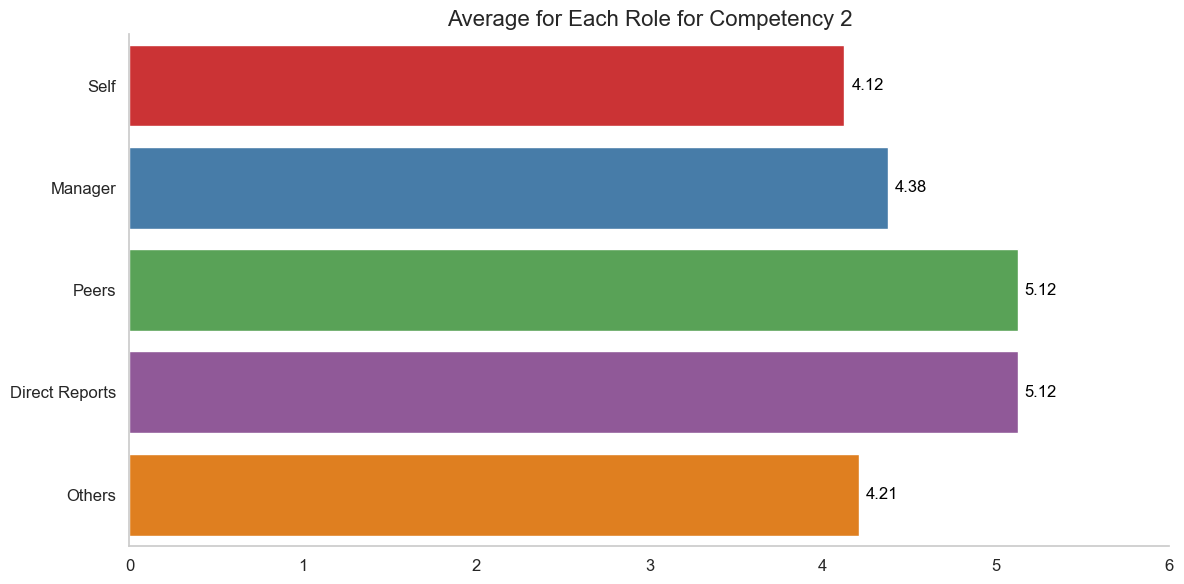

In [74]:
# Define data
c2_data = {
    'Feedback Roles': ['Self', 'Manager', 'Peers', 'Direct Reports', 'Others'],
    'Average': [se_c2_avg, mgr_c2_avg, pe_c2_avg, dr_c2_avg, oth_c2_avg]
}

# Create a DataFrame
c2_df = pd.DataFrame(c2_data)

# Create the horizontal bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
ax = sns.barplot(x='Average', y='Feedback Roles', data=c2_df, hue='Feedback Roles', palette='Set1', dodge=False)

# Set the x-axis scale from 0 to 6
plt.xlim(0, 6)

# Add labels at the end of each bar
for p in ax.patches:
    ax.annotate(
        format(p.get_width(), '.2f'),  # Format the label to 2 decimal places
        (p.get_width(), p.get_y() + p.get_height() / 2),  # Position at the end of the bar
        ha='left', va='center',  # Align left of the bar
        fontsize=12, color='black', xytext=(5, 0),  # Add slight offset to the right
        textcoords='offset points'
    )

# Add title
plt.title('Average for Each Role for Competency 2', fontsize=16)

# Remove x and y axis labels
plt.xlabel('')
plt.ylabel('')

# Adjust tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Remove gridlines
plt.grid(False)

# Remove spines
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()

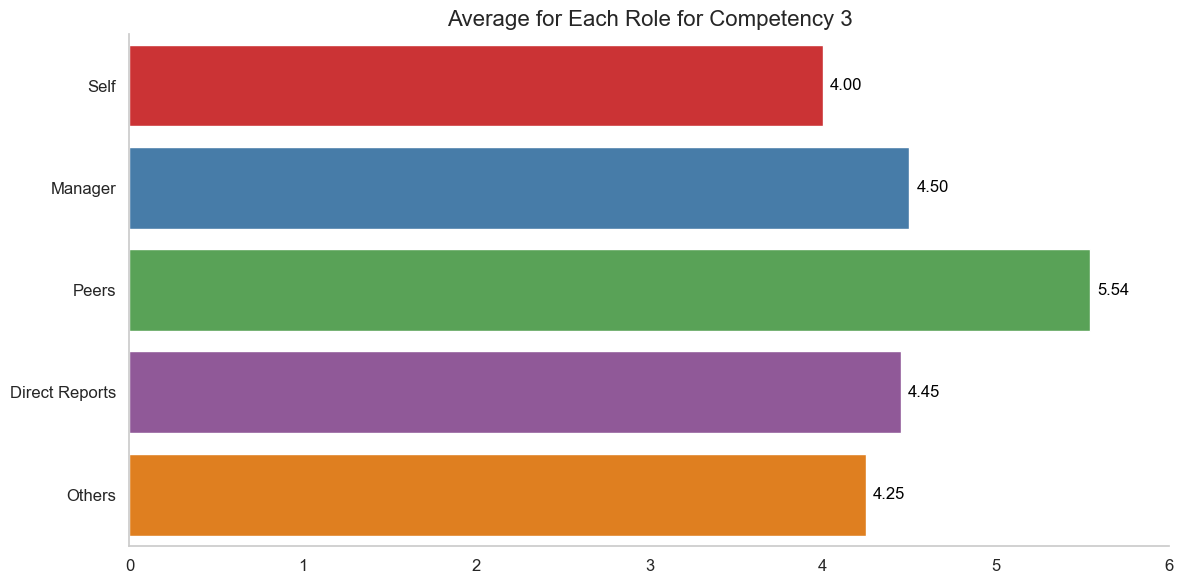

In [76]:
# Define data
c3_data = {
    'Feedback Roles': ['Self', 'Manager', 'Peers', 'Direct Reports', 'Others'],
    'Average': [se_c3_avg, mgr_c3_avg, pe_c3_avg, dr_c3_avg, oth_c3_avg]
}

# Create a DataFrame
c3_df = pd.DataFrame(c3_data)

# Create the horizontal bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
ax = sns.barplot(x='Average', y='Feedback Roles', data=c3_df, hue='Feedback Roles', palette='Set1', dodge=False)

# Set the x-axis scale from 0 to 6
plt.xlim(0, 6)

# Add labels at the end of each bar
for p in ax.patches:
    ax.annotate(
        format(p.get_width(), '.2f'),  # Format the label to 2 decimal places
        (p.get_width(), p.get_y() + p.get_height() / 2),  # Position at the end of the bar
        ha='left', va='center',  # Align left of the bar
        fontsize=12, color='black', xytext=(5, 0),  # Add slight offset to the right
        textcoords='offset points'
    )

# Add title
plt.title('Average for Each Role for Competency 3', fontsize=16)

# Remove x and y axis labels
plt.xlabel('')
plt.ylabel('')

# Adjust tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Remove gridlines
plt.grid(False)

# Remove spines
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()

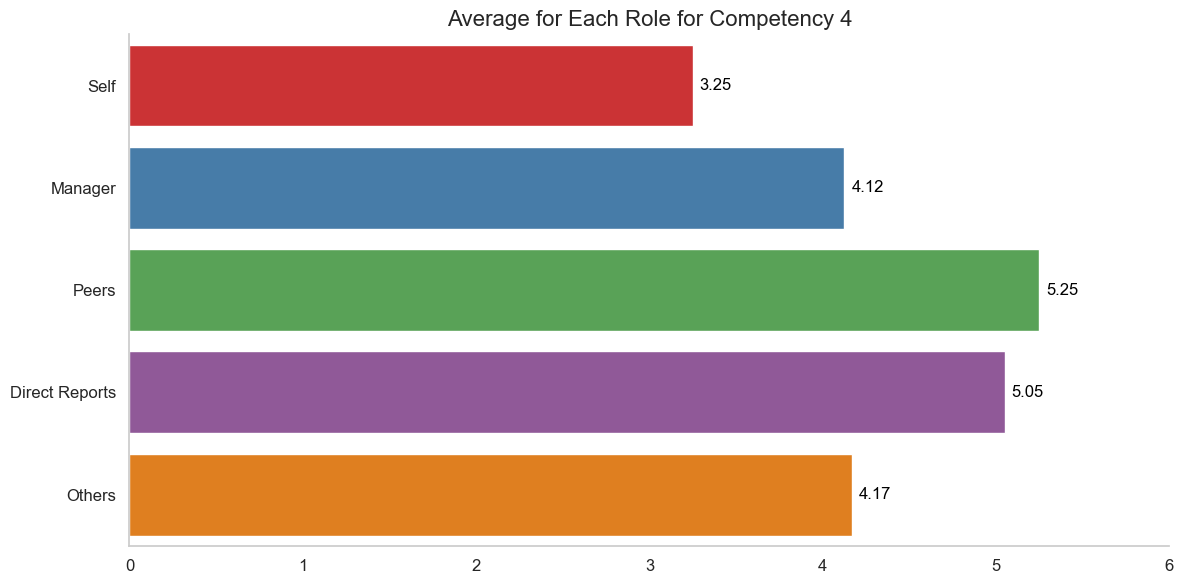

In [78]:
# Define data
c4_data = {
    'Category': ['Self', 'Manager', 'Peers', 'Direct Reports', 'Others'],
    'Average': [se_c4_avg, mgr_c4_avg, pe_c4_avg, dr_c4_avg, oth_c4_avg]
}

# Create a DataFrame
c4_df = pd.DataFrame(c4_data)

# Create the horizontal bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
ax = sns.barplot(x='Average', y='Category', data=c4_df, hue='Category', palette='Set1', dodge=False)

# Set the x-axis scale from 0 to 6
plt.xlim(0, 6)

# Add labels at the end of each bar
for p in ax.patches:
    ax.annotate(
        format(p.get_width(), '.2f'),  # Format the label to 2 decimal places
        (p.get_width(), p.get_y() + p.get_height() / 2),  # Position at the end of the bar
        ha='left', va='center',  # Align left of the bar
        fontsize=12, color='black', xytext=(5, 0),  # Add slight offset to the right
        textcoords='offset points'
    )

# Add title
plt.title('Average for Each Role for Competency 4', fontsize=16)

# Remove x and y axis labels
plt.xlabel('')
plt.ylabel('')

# Adjust tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Remove gridlines
plt.grid(False)

# Remove spines
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()

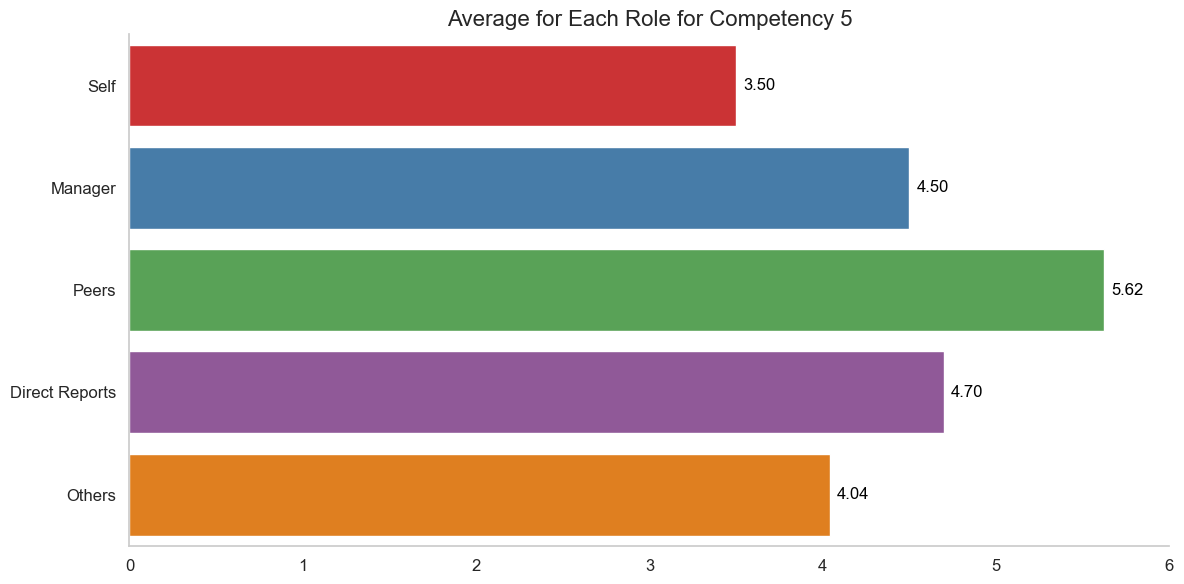

In [80]:
# Define data
c5_data = {
    'Feedback Roles': ['Self', 'Manager', 'Peers', 'Direct Reports', 'Others'],
    'Average': [se_c5_avg, mgr_c5_avg, pe_c5_avg, dr_c5_avg, oth_c5_avg]
}

# Create a DataFrame
c5_df = pd.DataFrame(c5_data)

# Create the horizontal bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
ax = sns.barplot(x='Average', y='Feedback Roles', data=c5_df, hue='Feedback Roles', palette='Set1', dodge=False)

# Set the x-axis scale from 0 to 6
plt.xlim(0, 6)

# Add labels at the end of each bar
for p in ax.patches:
    ax.annotate(
        format(p.get_width(), '.2f'),  # Format the label to 2 decimal places
        (p.get_width(), p.get_y() + p.get_height() / 2),  # Position at the end of the bar
        ha='left', va='center',  # Align left of the bar
        fontsize=12, color='black', xytext=(5, 0),  # Add slight offset to the right
        textcoords='offset points'
    )

# Add title
plt.title('Average for Each Role for Competency 5', fontsize=16)

# Remove x and y axis labels
plt.xlabel('')
plt.ylabel('')

# Adjust tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Remove gridlines
plt.grid(False)

# Remove spines
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()

In [82]:
# Chapter 3 Overview of Competencies by Groups

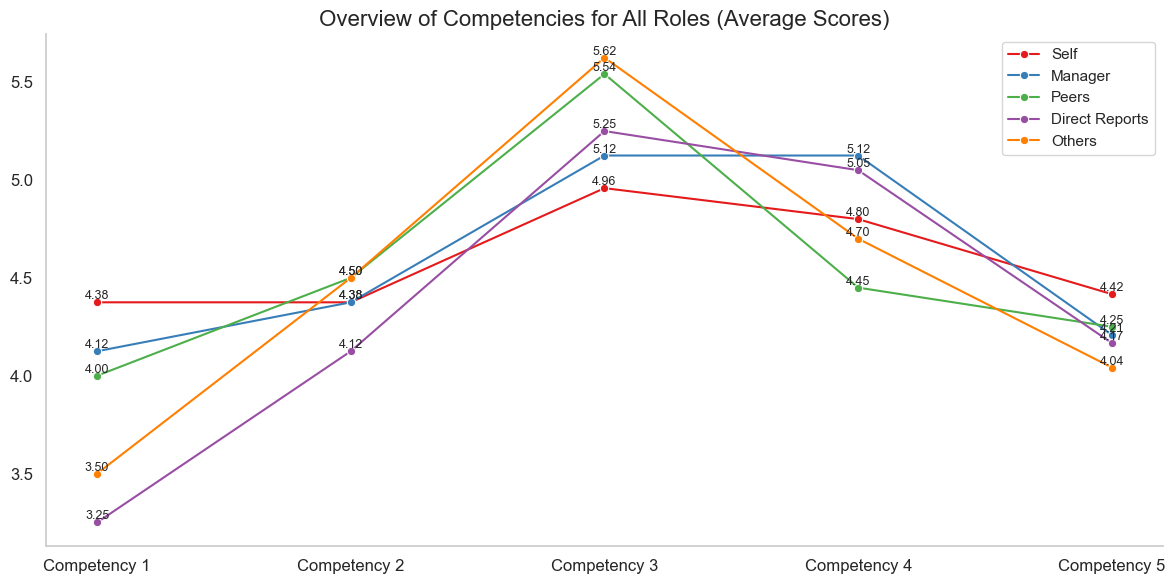

In [84]:
# Define data for each competency
roles = ['Self', 'Manager', 'Peers', 'Direct Reports', 'Others']
c1_calc = [se_c1_avg, mgr_c1_avg, pe_c1_avg, dr_c1_avg, oth_c1_avg]
c2_calc = [se_c2_avg, mgr_c2_avg, pe_c2_avg, dr_c2_avg, oth_c2_avg]
c3_calc = [se_c3_avg, mgr_c3_avg, pe_c3_avg, dr_c3_avg, oth_c3_avg]
c4_calc = [se_c4_avg, mgr_c4_avg, pe_c4_avg, dr_c4_avg, oth_c4_avg]
c5_calc = [se_c5_avg, mgr_c5_avg, pe_c5_avg, dr_c5_avg, oth_c5_avg]

# Create a DataFrame with competencies as x-axis and averages for each role
data = {
    'Competency': ['Competency 1', 'Competency 2', 'Competency 3', 'Competency 4', 'Competency 5'] * 5,
    'Average': c1_calc + c2_calc + c3_calc + c4_calc + c5_calc,
    'Role': (['Self'] * 5 + ['Manager'] * 5 + ['Peers'] * 5 + ['Direct Reports'] * 5 + ['Others'] * 5)
}

# Create a new DataFrame (keeping the original df intact)
competency_df = pd.DataFrame(data)

# Create the lineplot
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.lineplot(x='Competency', y='Average', hue='Role', data=competency_df, marker='o', palette='Set1')

# Add annotations for each data point
for i, row in competency_df.iterrows():
    plt.text(
        x=row['Competency'], 
        y=row['Average'], 
        s=f"{row['Average']:.2f}",  # Format the value to 2 decimal places
        fontsize=9, 
        ha='center', 
        va='bottom'
    )

# Add title
plt.title('Overview of Competencies for All Roles (Average Scores)', fontsize=16)

# Adjust tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Remove axis labels by setting them to empty strings
plt.xlabel('')
plt.ylabel('')

# Explicitly disable gridlines
plt.grid(False)

# Remove legend title
plt.legend(title=None)

# Remove spines for cleaner aesthetics
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()

In [86]:
# Chapter 4 Spread of Assessments

In [88]:
# Chapter 4.1 Spread of Assessments - Competency 1

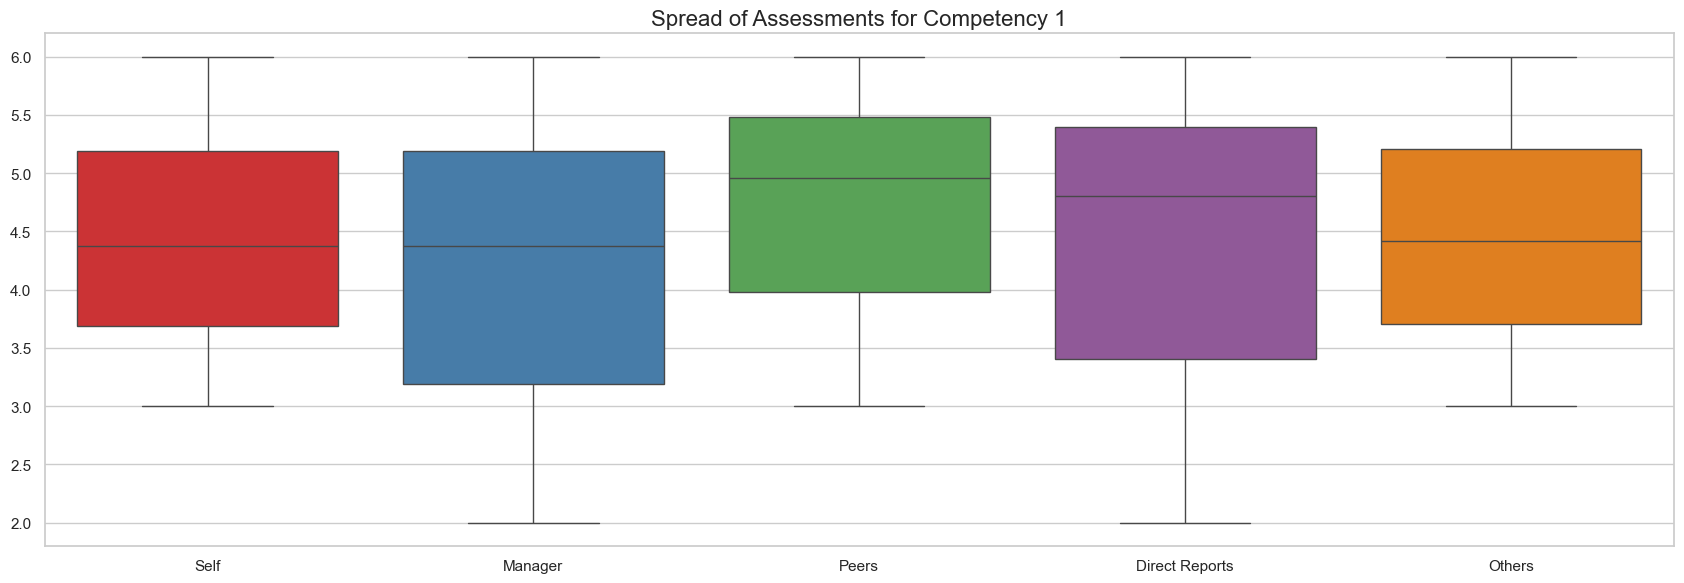

In [90]:
# Create a DataFrame for boxplot
c1_box_values = {
    'Feedback Roles': ['Self', 'Self', 'Self', 
             'Manager', 'Manager', 'Manager', 
             'Peers', 'Peers', 'Peers', 
             'Direct Reports', 'Direct Reports', 'Direct Reports', 
             'Others', 'Others', 'Others'],
    'Values': [
        se_c1_min, se_c1_avg, se_c1_max,
        mgr_c1_min, mgr_c1_avg, mgr_c1_max,
        pe_c1_min, pe_c1_avg, pe_c1_max,
        dr_c1_min, dr_c1_avg, dr_c1_max,
        oth_c1_min, oth_c1_avg, oth_c1_max
    ]
}

# Convert to DataFrame
c2_box_df = pd.DataFrame(c1_box_values)

# Create the boxplot
plt.figure(figsize=(17, 6))
sns.boxplot(x='Feedback Roles', y='Values', hue='Feedback Roles', data=c1_box_values, palette='Set1', dodge=False)  # Set hue=x

# Add title and labels
plt.title('Spread of Assessments for Competency 1', fontsize=16)

# Remove x-axis and y-axis labels
plt.xlabel('')
plt.ylabel('')

# Show the plot
plt.tight_layout()
plt.show()

In [92]:
# Chapter 4.2 Spread of Assessments - Competency 2

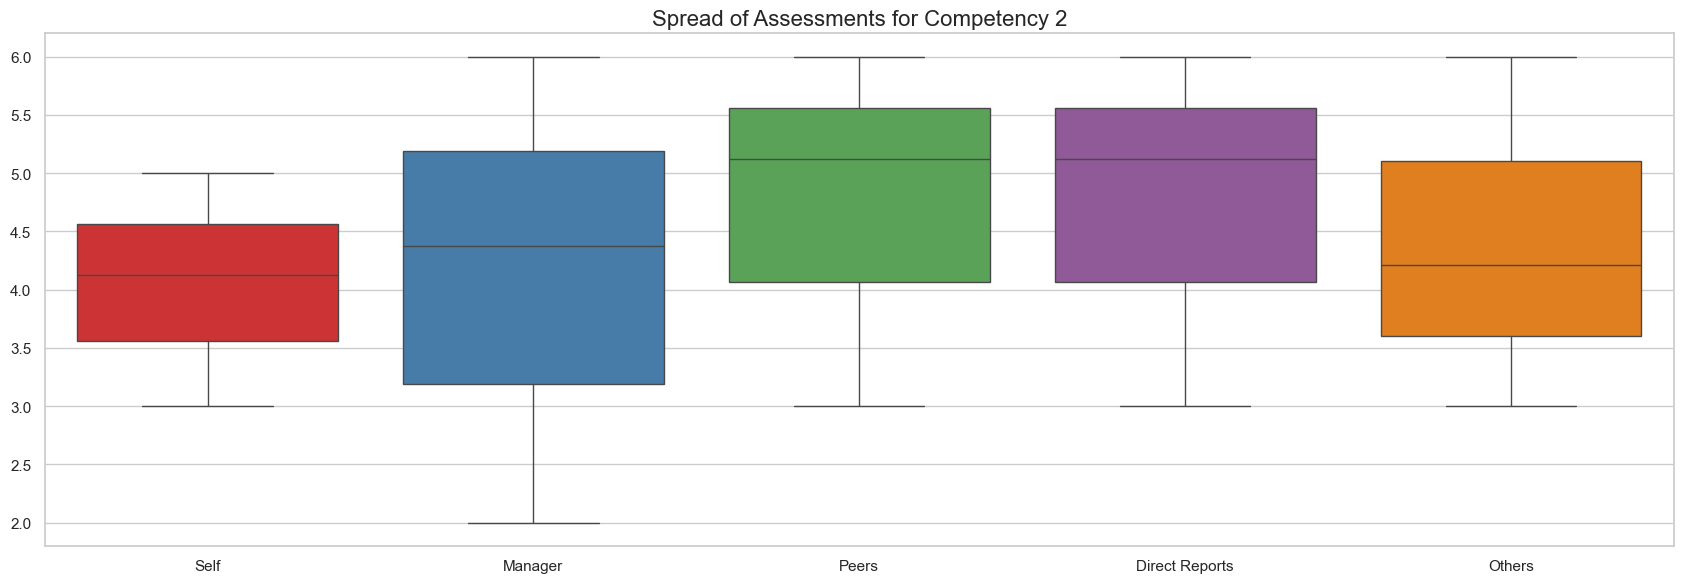

In [94]:
# Create a DataFrame for boxplot
c2_box_values = {
    'Feedback Roles': ['Self', 'Self', 'Self', 
             'Manager', 'Manager', 'Manager', 
             'Peers', 'Peers', 'Peers', 
             'Direct Reports', 'Direct Reports', 'Direct Reports', 
             'Others', 'Others', 'Others'],
    'Values': [
        se_c2_min, se_c2_avg, se_c2_max,
        mgr_c2_min, mgr_c2_avg, mgr_c2_max,
        pe_c2_min, pe_c2_avg, pe_c2_max,
        dr_c2_min, dr_c2_avg, dr_c2_max,
        oth_c2_min, oth_c2_avg, oth_c2_max
    ]
}

# Convert to DataFrame
c2_box_df = pd.DataFrame(c2_box_values)

# Create the boxplot
plt.figure(figsize=(17, 6))
sns.boxplot(x='Feedback Roles', y='Values', hue='Feedback Roles', data=c2_box_df, palette='Set1', dodge=False)

# Add title and labels
plt.title('Spread of Assessments for Competency 2', fontsize=16)

# Remove x-axis and y-axis labels
plt.xlabel('')
plt.ylabel('')

# Show the plot
plt.tight_layout()
plt.show()

In [96]:
# Chapter 4.3 Spread of Assessments - Competency 3

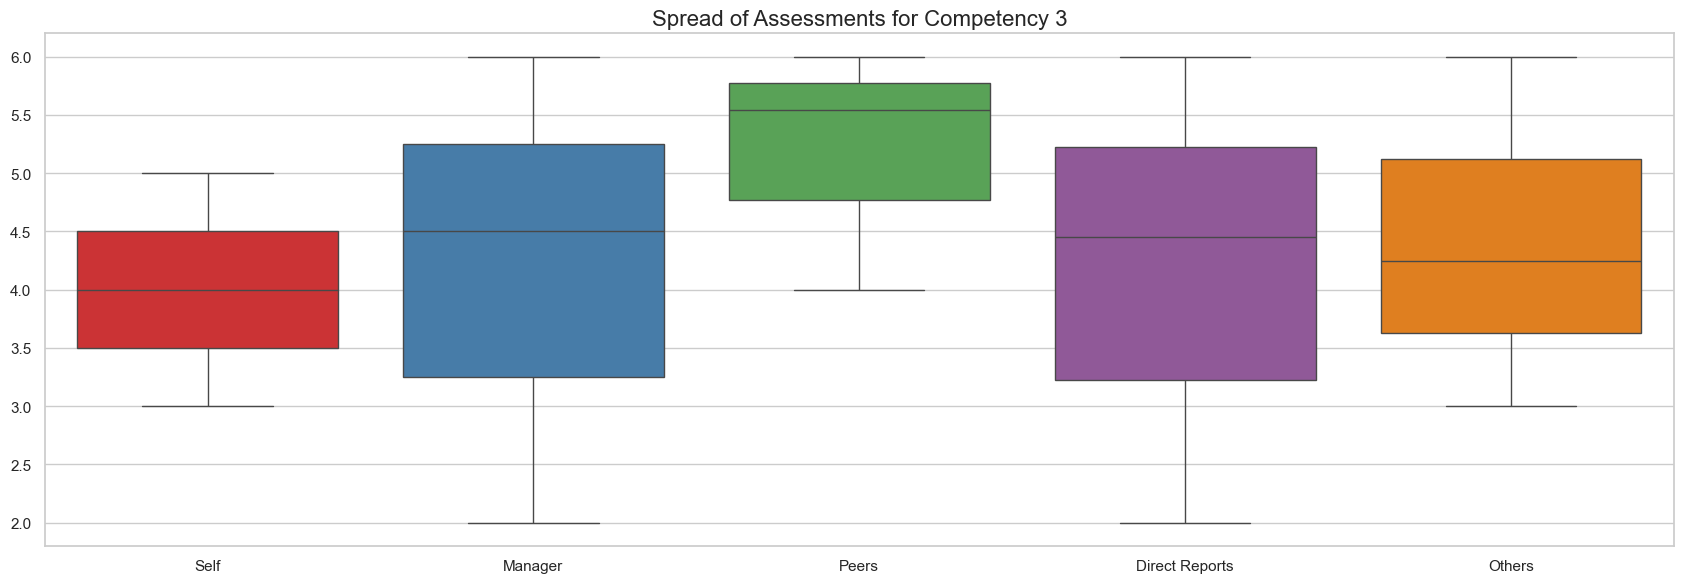

In [98]:
# Create a DataFrame for boxplot
c3_box_values = {
    'Feedback Roles': ['Self', 'Self', 'Self', 
             'Manager', 'Manager', 'Manager', 
             'Peers', 'Peers', 'Peers', 
             'Direct Reports', 'Direct Reports', 'Direct Reports', 
             'Others', 'Others', 'Others'],
    'Values': [
        se_c3_min, se_c3_avg, se_c3_max,
        mgr_c3_min, mgr_c3_avg, mgr_c3_max,
        pe_c3_min, pe_c3_avg, pe_c3_max,
        dr_c3_min, dr_c3_avg, dr_c3_max,
        oth_c3_min, oth_c3_avg, oth_c3_max
    ]
}

# Convert to DataFrame
c3_box_df = pd.DataFrame(c3_box_values)

# Create the boxplot
plt.figure(figsize=(17, 6))
sns.boxplot(x='Feedback Roles', y='Values', hue='Feedback Roles', data=c3_box_df, palette='Set1', dodge=False)

# Add title and labels
plt.title('Spread of Assessments for Competency 3', fontsize=16)

# Remove x-axis and y-axis labels
plt.xlabel('')
plt.ylabel('')

# Show the plot
plt.tight_layout()
plt.show()

In [100]:
# Chapter 4.4 Spread of Assessments - Competency 4

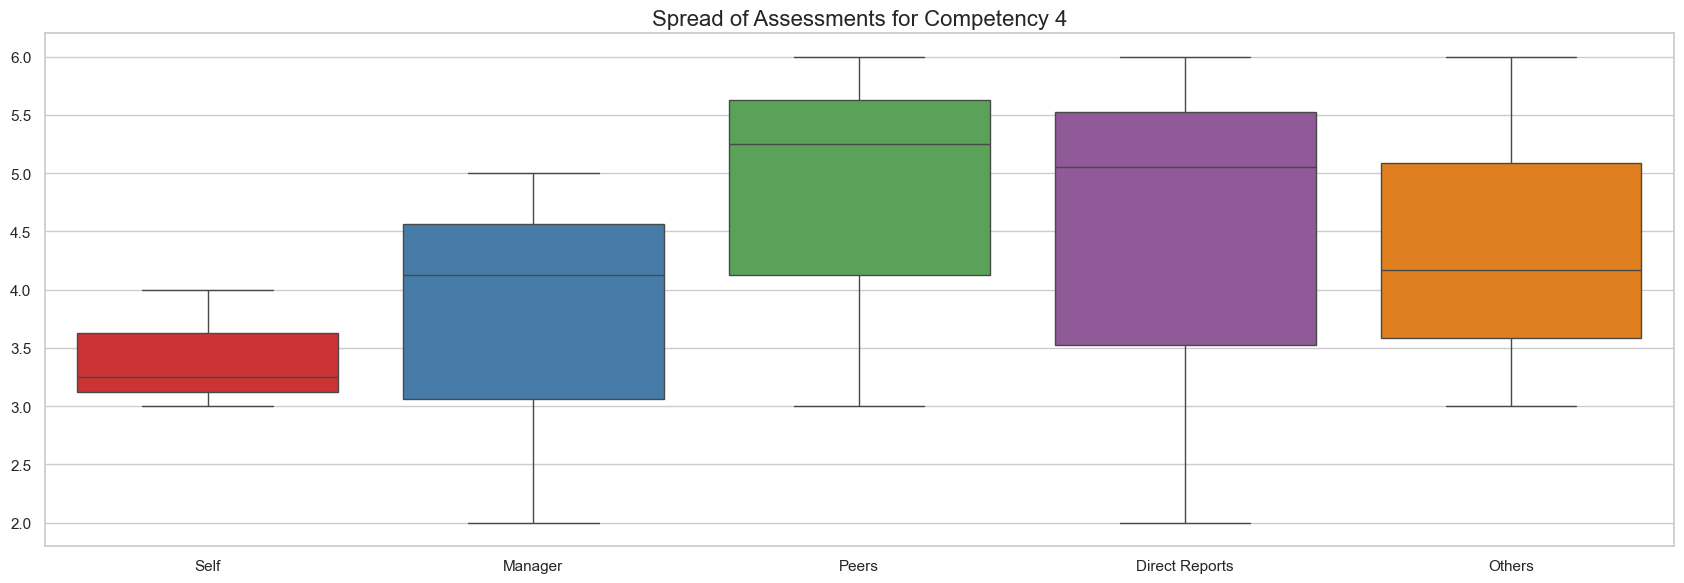

In [102]:
# Create a DataFrame for boxplot
c4_box_values = {
    'Feedback Roles': ['Self', 'Self', 'Self', 
             'Manager', 'Manager', 'Manager', 
             'Peers', 'Peers', 'Peers', 
             'Direct Reports', 'Direct Reports', 'Direct Reports', 
             'Others', 'Others', 'Others'],
    'Values': [
        se_c4_min, se_c4_avg, se_c4_max,
        mgr_c4_min, mgr_c4_avg, mgr_c4_max,
        pe_c4_min, pe_c4_avg, pe_c4_max,
        dr_c4_min, dr_c4_avg, dr_c4_max,
        oth_c4_min, oth_c4_avg, oth_c4_max
    ]
}

# Convert to DataFrame
c4_box_df = pd.DataFrame(c4_box_values)

# Create the boxplot
plt.figure(figsize=(17, 6))
sns.boxplot(x='Feedback Roles', y='Values', hue='Feedback Roles', data=c4_box_df, palette='Set1', dodge=False)

# Add title and labels
plt.title('Spread of Assessments for Competency 4', fontsize=16)

# Remove x-axis and y-axis labels
plt.xlabel('')
plt.ylabel('')

# Show the plot
plt.tight_layout()
plt.show()

In [104]:
# Chapter 4.5 Spread of Assessments - Competency 5

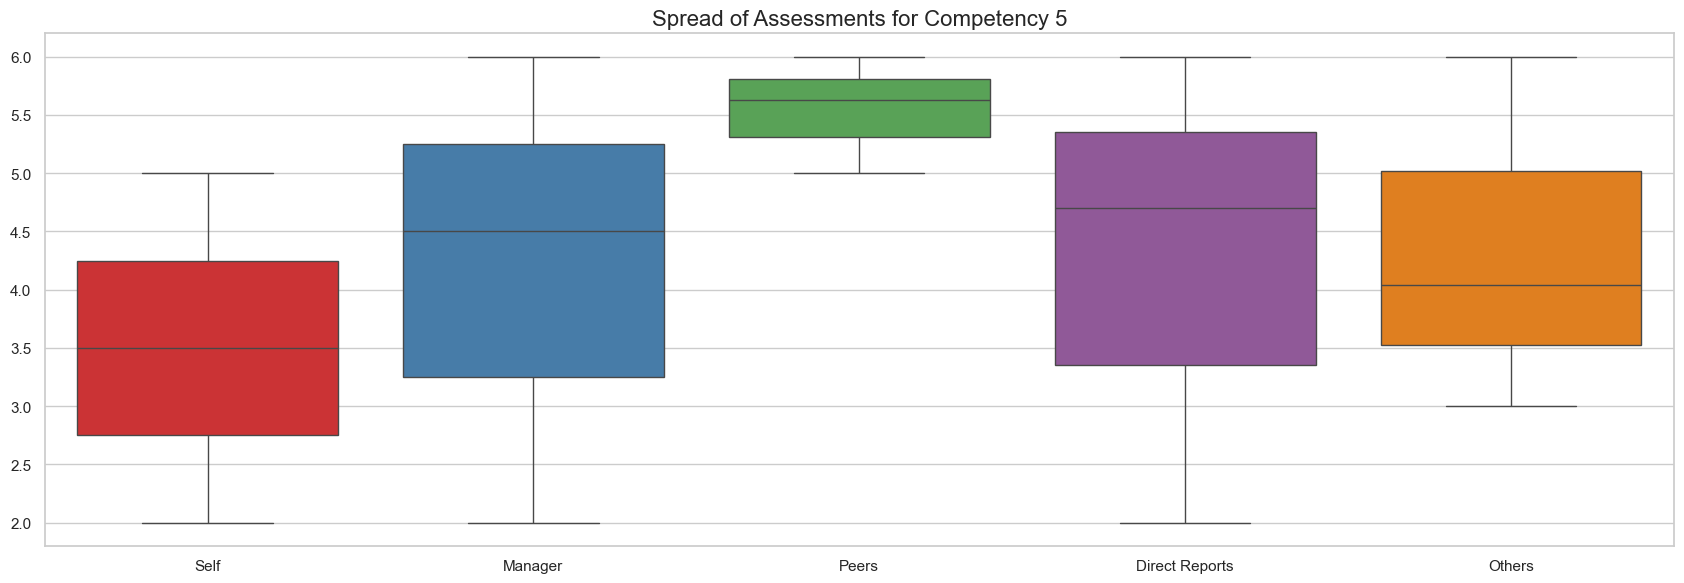

In [106]:
# Create a DataFrame for boxplot
c5_box_values = {
    'Feedback Roles': ['Self', 'Self', 'Self', 
             'Manager', 'Manager', 'Manager', 
             'Peers', 'Peers', 'Peers', 
             'Direct Reports', 'Direct Reports', 'Direct Reports', 
             'Others', 'Others', 'Others'],
    'Values': [
        se_c5_min, se_c5_avg, se_c5_max,
        mgr_c5_min, mgr_c5_avg, mgr_c5_max,
        pe_c5_min, pe_c5_avg, pe_c5_max,
        dr_c5_min, dr_c5_avg, dr_c5_max,
        oth_c5_min, oth_c5_avg, oth_c5_max
    ]
}

# Convert to DataFrame
c5_box_df = pd.DataFrame(c5_box_values)

# Create the boxplot
plt.figure(figsize=(17, 6))
sns.boxplot(x='Feedback Roles', y='Values', hue='Feedback Roles', data=c5_box_df, palette='Set1', dodge=False)

# Add title and labels
plt.title('Spread of Assessments for Competency 5', fontsize=16)

# Remove x-axis and y-axis labels
plt.xlabel('')
plt.ylabel('')

# Show the plot
plt.tight_layout()
plt.show()

In [108]:
# Chapter 5 Top 5 and Low 5 questions - Average for all feedback roles except "Self"

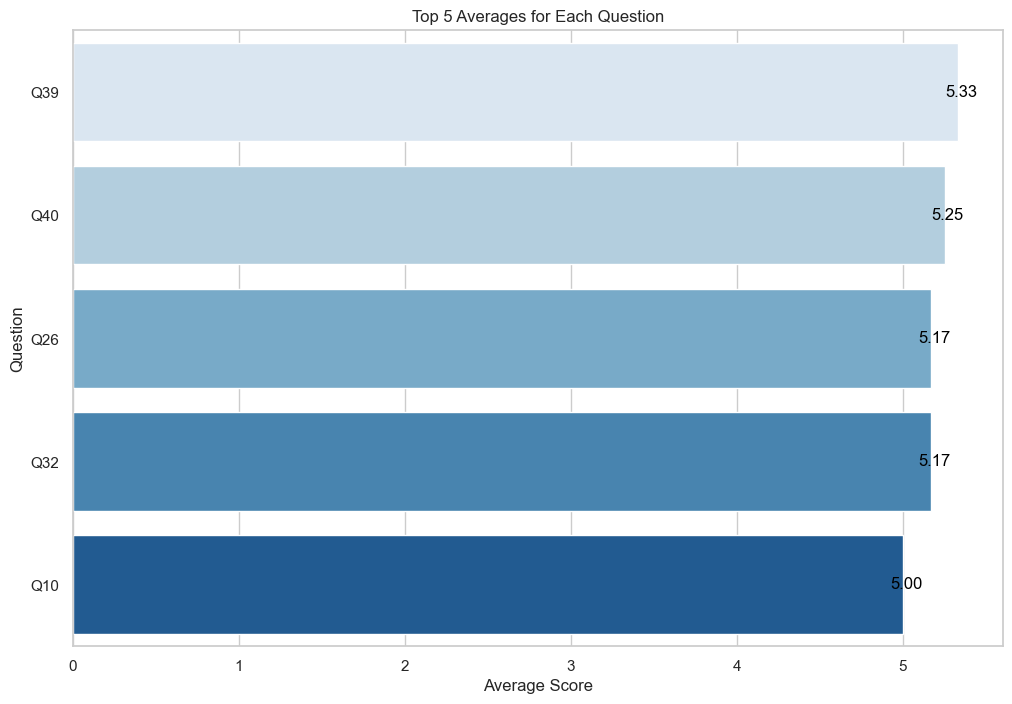

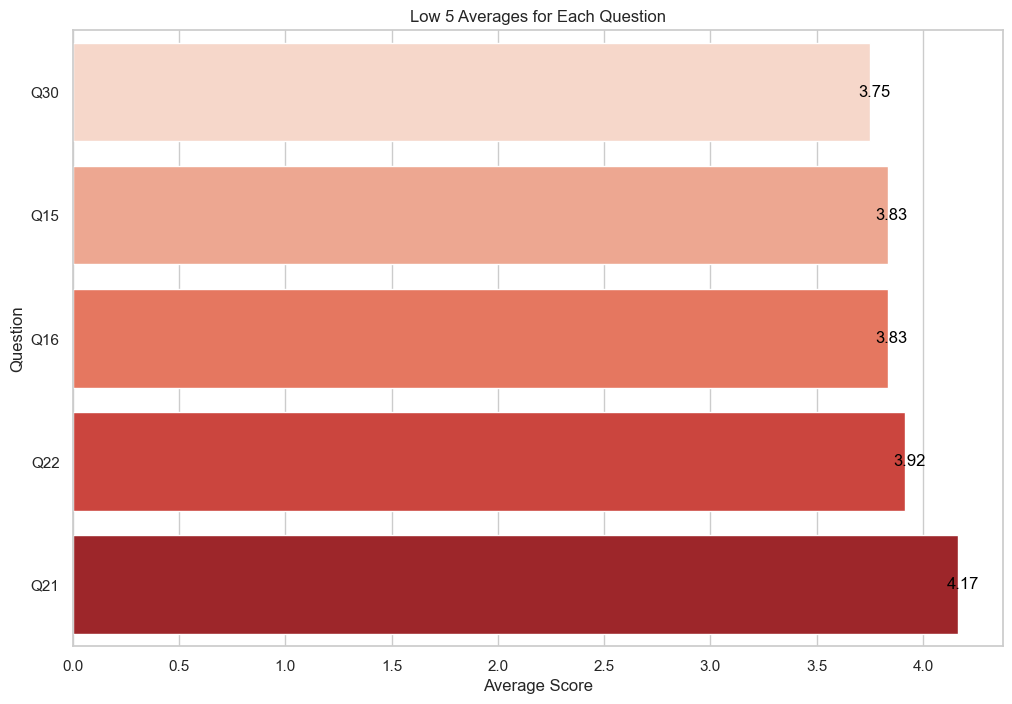

In [110]:
# Filter the DataFrame based on 'Feedback Roles'
pd_df2 = df[
    df['Feedback Roles'].isin([
        'Manager',
        'Peers',
        'Direct Reports', 
        'Others'
    ])
].copy()  # Make an explicit copy to avoid modifying the original DataFrame

# Create a new column 'Feedback Providers' by merging all roles into one category
pd_df2.loc[:, 'Feedback Providers'] = 'Feedback Providers'

# List of questions to calculate averages for (Q1 to Q40)
questions = [f'Q{i}' for i in range(1, 41)]

# Calculate the averages for each question by the 'Feedback Providers' category
averages = pd_df2.groupby('Feedback Providers')[questions].mean()

# Sort the averages for each question and get the top 5 and low 5
top_5_averages = averages.apply(lambda x: x.nlargest(5), axis=0)
low_5_averages = averages.apply(lambda x: x.nsmallest(5), axis=0)

# Reshape the data to long format for easier plotting (Top 5)
top_5_long = top_5_averages.reset_index().melt(id_vars='Feedback Providers', var_name='Question', value_name='Average').sort_values(by='Average', ascending=False)

# Reshape the data to long format for easier plotting (Low 5)
low_5_long = low_5_averages.reset_index().melt(id_vars='Feedback Providers', var_name='Question', value_name='Average').sort_values(by='Average')

# Limit to Top 5 and Low 5 only (Top and Low 5 averages are already sorted above)
top_5_long = top_5_long.head(5)  # Get only the first 5 rows
low_5_long = low_5_long.head(5)  # Get only the first 5 rows

# Plotting Top 5 averages with gradient blue color
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Average', y='Question', data=top_5_long, hue='Question', palette="Blues", dodge=False, legend=False)
plt.title("Top 5 Averages for Each Question")
plt.xlabel("Average Score")
plt.ylabel("Question")

# Adding bar labels for the averages
for p in ax.patches:
    ax.text(p.get_width() + 0.02, p.get_y() + p.get_height() / 2, f'{p.get_width():.2f}', 
            ha='center', va='center', color='black', fontsize=12)

plt.show()

# Plotting Low 5 averages with gradient red color
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Average', y='Question', data=low_5_long, hue='Question', palette="Reds", dodge=False, legend=False)
plt.title("Low 5 Averages for Each Question")
plt.xlabel("Average Score")
plt.ylabel("Question")

# Adding bar labels for the averages
for p in ax.patches:
    ax.text(p.get_width() + 0.02, p.get_y() + p.get_height() / 2, f'{p.get_width():.2f}', 
            ha='center', va='center', color='black', fontsize=12)

plt.show()

In [112]:
# Analyze text with TextBlob
def analyze_text(text):
    blob = TextBlob(str(text))  # Convert text to string in case of NaN or non-string types
    return pd.Series({
        'polarity': blob.sentiment.polarity,  # Sentiment polarity
        'subjectivity': blob.sentiment.subjectivity  # Sentiment subjectivity
    })

# Select the last three columns
last_three_columns = df.iloc[:, -3:]  # Dynamically select the last three columns

# Flatten the text from the last three columns into a single string per row
df['combined_text'] = last_three_columns.apply(lambda row: ' '.join(row.dropna().astype(str)), axis=1)

# Apply the TextBlob analysis to the combined text
analysis_results = df['combined_text'].apply(analyze_text)

# Combine the original DataFrame with the analysis results
df_with_analysis = pd.concat([df, analysis_results], axis=1)

# Display the new DataFrame with the analysis results
df_with_analysis.head()

,Feedback Roles,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q37,Q38,Q39,Q40,OQ1,OQ2,OQ3,combined_text,polarity,subjectivity
0,Self,3,6,4,5,5,3,5,4,3,...,5,3,3,4,.,.,.,. . .,0.000000,0.000000
1,Manager,4,2,6,5,6,3,6,3,5,...,6,5,4,4,"Question status quo, challenge organization. B...",Build stronger team spirit in the organization...,"Stop worrying too much, at times. You are doin...","Question status quo, challenge organization. B...",0.162500,0.495833
2,Peers,6,5,6,4,6,5,6,5,6,...,6,6,5,5,Facilitate collaboration between people from o...,Push his team members to be more self confiden...,Putting a lot of direct pressure on the team w...,Facilitate collaboration between people from o...,0.246875,0.466667
3,Peers,3,3,5,4,5,6,5,6,6,...,5,6,6,6,Sharing very wide knowledge and experience.,Creating environment that people do not fear t...,Interrupt others while they are talking underm...,Sharing very wide knowledge and experience. Cr...,-0.130000,0.520000
4,Peers,5,6,3,6,4,6,3,6,5,...,5,5,6,6,"Should continue the changes in organization, t...",Find a way to better organize your time result...,Nothing to add.,"Should continue the changes in organization, t...",0.318182,0.477273


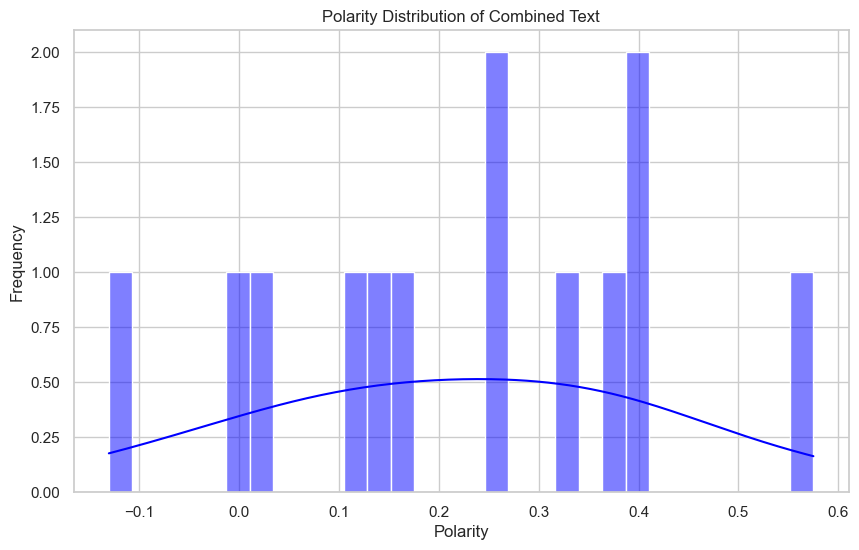

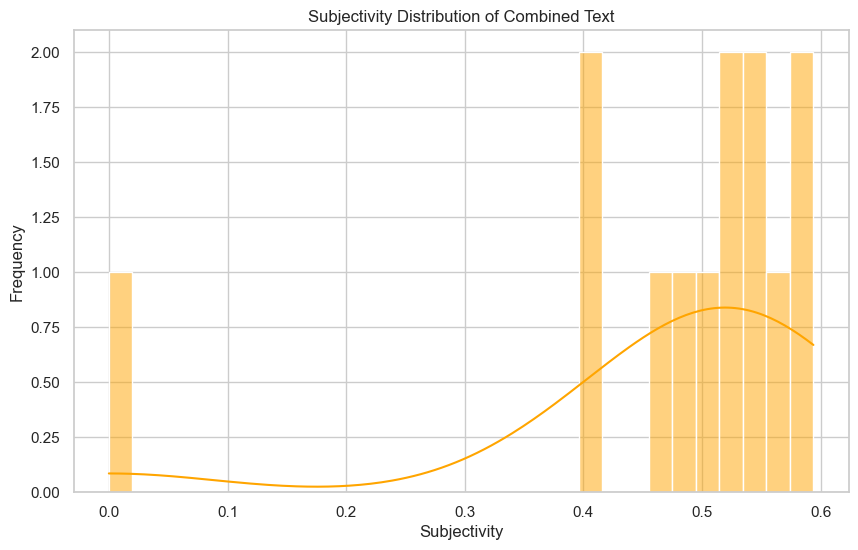

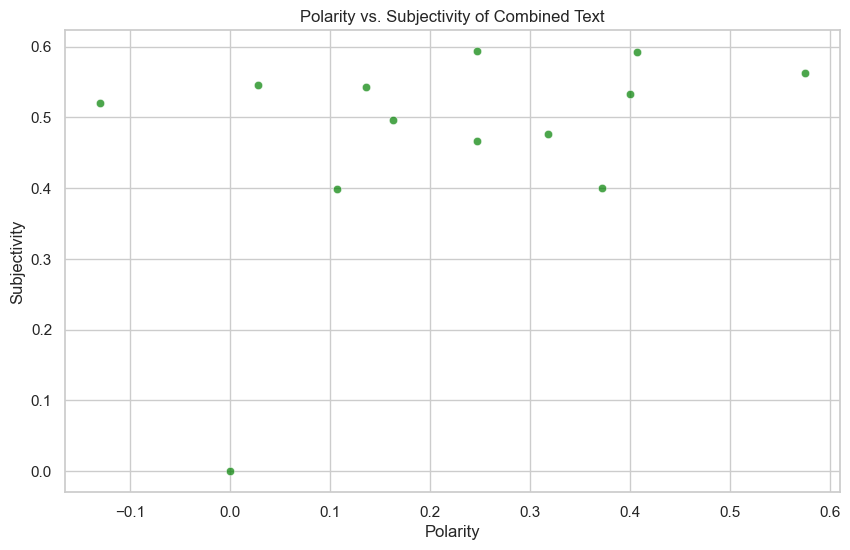

In [114]:
# Ensure df_with_analysis exists with 'polarity' and 'subjectivity' columns

# Polarity Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_with_analysis['polarity'], kde=True, bins=30, color='blue')
plt.title('Polarity Distribution of Combined Text')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()

# Subjectivity Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_with_analysis['subjectivity'], kde=True, bins=30, color='orange')
plt.title('Subjectivity Distribution of Combined Text')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')
plt.show()

# Scatter Plot: Polarity vs Subjectivity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_with_analysis, x='polarity', y='subjectivity', color='green', alpha=0.7)
plt.title('Polarity vs. Subjectivity of Combined Text')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.grid(True)
plt.show()